In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from scipy import stats



df = pd.read_csv('indicium_precificacao_sem_outliers.csv')
print(df.info())
#pd.set_option('display.max_columns', None)
print(df.describe())

colunas = ['price', 'minimo_noites', 'numero_de_reviews', 'disponibilidade_365']
df_selecionado = df[colunas]
print(df_selecionado.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45407 entries, 0 to 45406
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             45407 non-null  float64
 1   nome                           45393 non-null  object 
 2   host_id                        45407 non-null  float64
 3   host_name                      45386 non-null  object 
 4   bairro_group                   45407 non-null  object 
 5   bairro                         45407 non-null  object 
 6   latitude                       45407 non-null  float64
 7   longitude                      45407 non-null  float64
 8   room_type                      45407 non-null  object 
 9   price                          45407 non-null  float64
 10  minimo_noites                  45407 non-null  float64
 11  numero_de_reviews              45407 non-null  float64
 12  ultima_review                  36603 non-null 

                 count        mean        std   min   25%    50%    75%    max
bairro_group                                                                  
Bronx           1013.0   70.994077  35.598052  10.0  45.0   63.0   86.0  225.0
Brooklyn       18840.0  103.912049  60.492043  10.0  60.0   88.0  135.0  340.0
Manhattan      19903.0  153.739135  82.936564  10.0  90.0  139.0  200.0  433.0
Queens          5303.0   84.318122  48.348521  10.0  50.0   70.0  100.0  285.0
Staten Island    348.0   81.784483  45.772361  13.0  50.0   71.0  100.0  250.0


/tmp/ipykernel_1185116/747787009.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_regiao.index, y=media_regiao.values, palette='viridis')


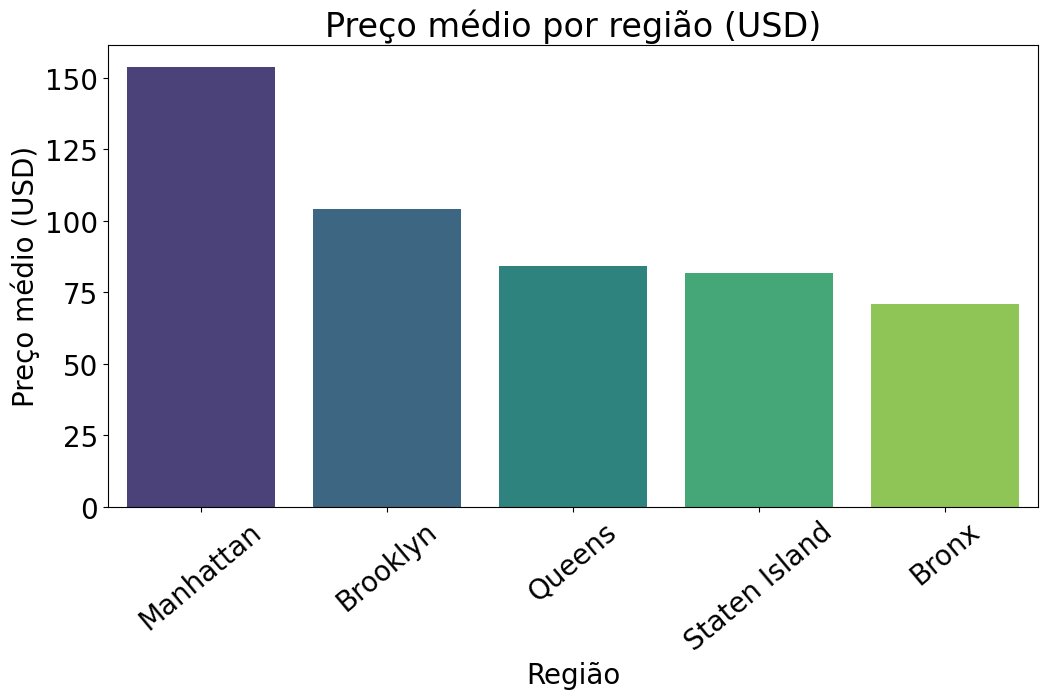

In [4]:
stat_bairros = df.groupby('bairro_group')['price'].describe()
print(stat_bairros)

media_regiao = df.groupby('bairro_group')['price'].mean()
media_regiao = media_regiao.sort_values(ascending=False)

params = {
   'axes.labelsize': 20,
   'font.size': 20,
   'legend.fontsize': 20,
   'xtick.labelsize': 20,
   'ytick.labelsize': 20,
   'figure.figsize': [9, 6]
   }
plt.rcParams.update(params)

plt.figure(figsize=(12,6))
sns.barplot(x=media_regiao.index, y=media_regiao.values, palette='viridis')
plt.title('Preço médio por região (USD)')
plt.xlabel('Região')
plt.ylabel('Preço médio (USD)')
plt.xticks(rotation=40)
plt.show()
#plt.savefig('preco_medio_regiao.png', dpi=300, bbox_inches='tight')
#plt.close()



bairro_group
Brooklyn         100.204141
Manhattan        111.984580
Queens           144.451818
Bronx            165.794495
Staten Island    199.678284
Name: disponibilidade_365, dtype: float64


/tmp/ipykernel_1185116/2292470449.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


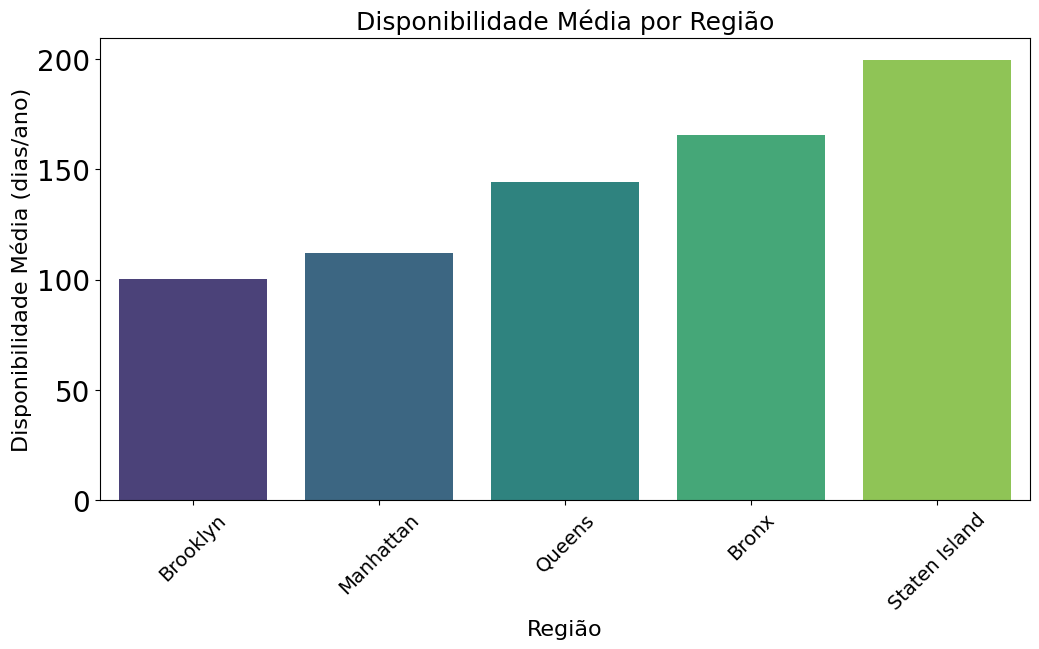

In [5]:
df = pd.read_csv('indicium_precificacao.csv')
disp= df.groupby('bairro_group')['disponibilidade_365'].mean().sort_values()

print(disp)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=disp.index,
    y=disp.values,
    palette='viridis'
)
plt.title('Disponibilidade Média por Região', fontsize=18)
plt.xlabel('Região', fontsize=16)
plt.ylabel('Disponibilidade Média (dias/ano)', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
#plt.savefig('disponibilidade_por_bairro.png', dpi=300, bbox_inches='tight')
plt.show()

Kolmogorov-Smirnov Test Statistic: 0.14408782827685424
Kolmogorov-Smirnov Test p-value: 0.0
Anderson-Darling Test Statistic: 1377.9249425365851
Anderson-Darling Critical Values: [0.576 0.656 0.787 0.918 1.092]
Anderson-Darling Significance Levels: [15.  10.   5.   2.5  1. ]


((array([-4.16947524, -3.96269987, -3.84992782, ...,  3.84992782,
          3.96269987,  4.16947524]),
  array([ 10.,  10.,  10., ..., 432., 433., 433.])),
 (71.04667927982516, 122.56017794613163, 0.9439765821626056))

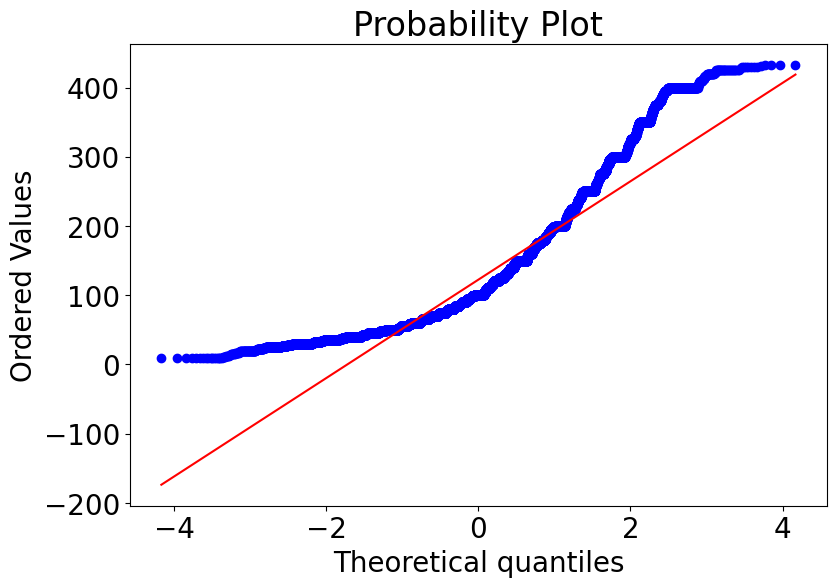

In [9]:
import numpy as np
from scipy import stats

df = pd.read_csv('indicium_precificacao_sem_outliers.csv')
df_clean = df['price'].replace([np.inf, -np.inf], np.nan).dropna()

#Teste: Kolmogorov-Smirnov
ks_test = stats.kstest(df['price'], 'norm', args=(df['price'].mean(), df['price'].std()))
print('Kolmogorov-Smirnov Test Statistic:', ks_test.statistic)
print('Kolmogorov-Smirnov Test p-value:', ks_test.pvalue)

#Teste: Anderson-Darling
anderson_test = stats.anderson(df['price'], dist='norm')
print('Anderson-Darling Test Statistic:', anderson_test.statistic)
print('Anderson-Darling Critical Values:', anderson_test.critical_values)
print('Anderson-Darling Significance Levels:', anderson_test.significance_level)
stats.probplot(df['price'], dist="norm", plot=plt)


In [2]:
import pandas as pd
df = pd.read_csv('indicium_precificacao.csv')

def find_outliers(df, coluna):
    q1 = df[coluna].quantile(0.25)
    q3 = df[coluna].quantile(0.75)
    iqr = q3 - q1
    lim_inf = q1 - 1.5 * iqr
    lim_sup = q3 + 1.5 * iqr
    outliers = df[(df[coluna] < lim_inf) | (df[coluna] > lim_sup)]
    return outliers

groups = df.groupby(['bairro_group', 'room_type'])
outliers_groups = {}
# for group_name, data_group in groups:
#     outliers = find_outliers(data_group, 'price')
#     outliers_groups[group_name] = outliers
# for group_name, outliers in outliers_groups.items():
#     print(group_name)
#     print(outliers[['price', 'minimo_noites']])
#     print('\n')

df_new = df.copy()

for group_name, data_group in groups:
    outliers_rm = find_outliers(data_group, 'price')
    df_new.loc[outliers_rm.index, 'price'] = None

df_new = df_new.dropna(subset=['price'])
df_new.to_csv('indicium_precificacao_sem_outliers.csv', index=False)
#plt.figure(figsize=(12, 5))
plt.show()

NameError: name 'plt' is not defined

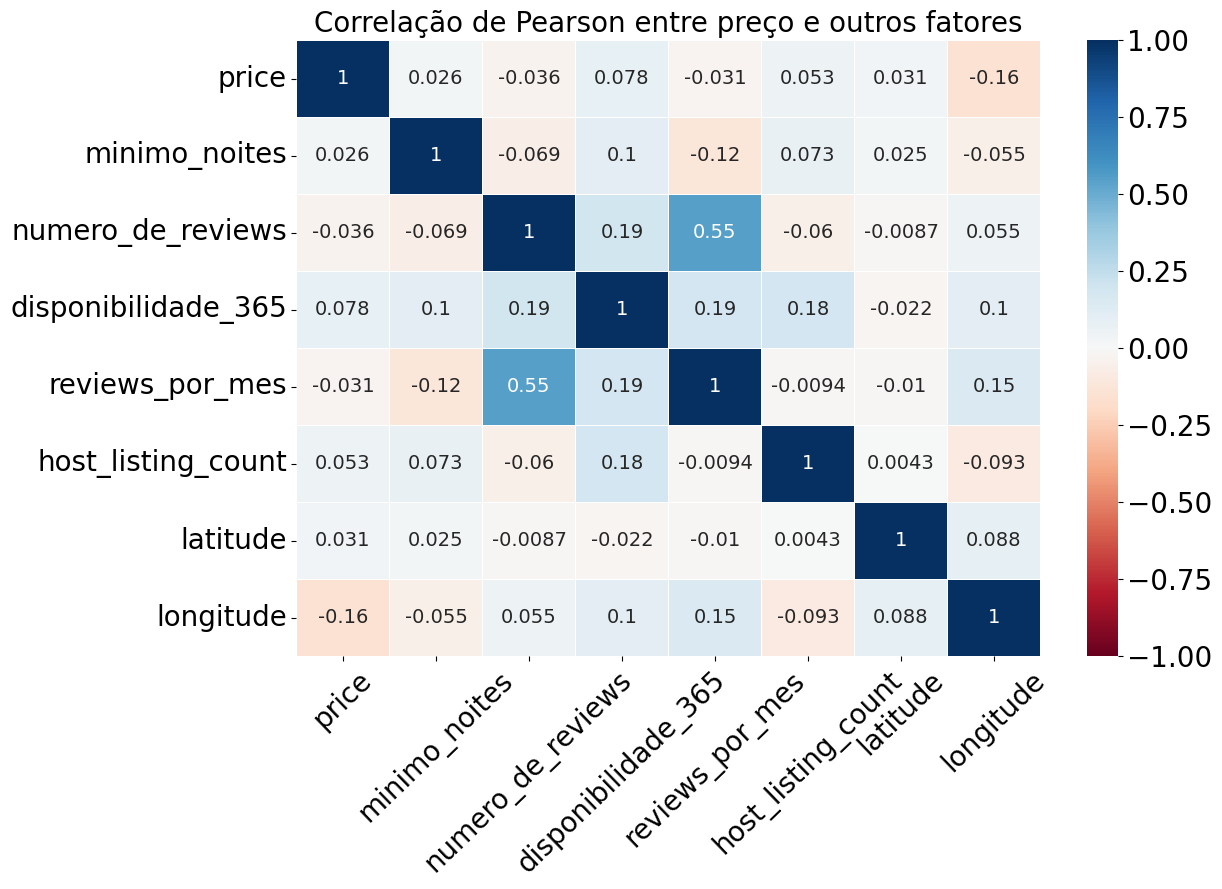

In [16]:
df = pd.read_csv('indicium_precificacao.csv')
colunas = ['price', 'minimo_noites', 'numero_de_reviews', 'disponibilidade_365',
            'reviews_por_mes', 'calculado_host_listings_count', 'latitude', 'longitude']
df_num = df[colunas].rename(columns={'calculado_host_listings_count': 'host_listing_count'})
df_num = df_num.dropna()
matrix_corr = df_num.corr(method='pearson')
plt.figure(figsize=(12, 8))
sns.heatmap(
    matrix_corr,
    annot=True,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot_kws={"size": 14})
plt.xticks(rotation=44)
plt.title('Correlação de Pearson entre preço e outros fatores', fontsize=20)
plt.show()

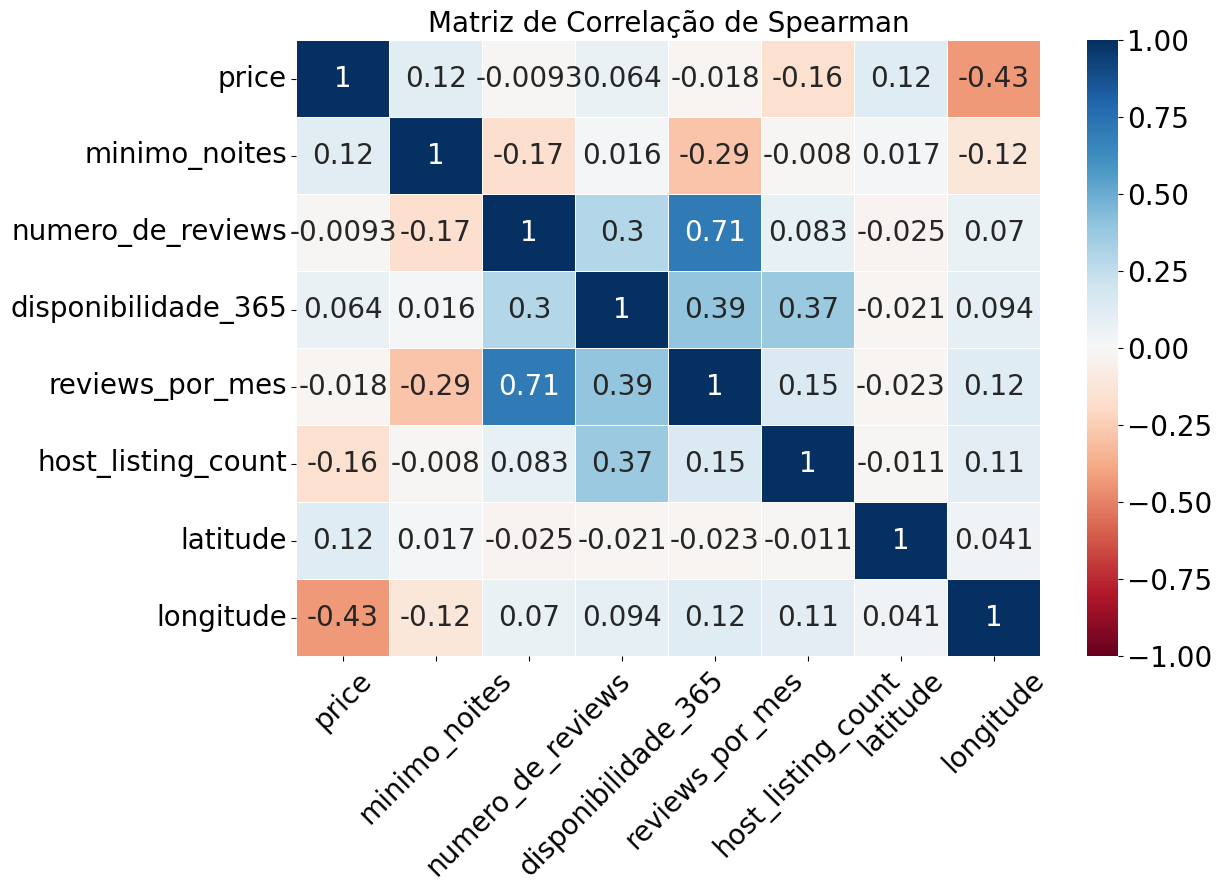

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('indicium_precificacao.csv')
colunas = ['price', 'minimo_noites', 'numero_de_reviews', 'disponibilidade_365',
            'reviews_por_mes', 'calculado_host_listings_count', 'latitude', 'longitude']
df_num = df[colunas].rename(columns={'calculado_host_listings_count': 'host_listing_count'})
df_num = df_num.dropna()
matrix = df_num.corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(
    matrix,
    annot=True,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    linewidths=0.5
)
plt.title('Matriz de Correlação de Spearman', fontsize=20)
plt.xticks(rotation=45)
plt.show()
#plt.savefig('matriz_spearman.png', dpi=300, bbox_inches='tight')


In [ ]:
#MODELOS PREDITIVOS:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('indicium_precificacao_sem_outliers.csv')

features = ['bairro_group', 'bairro', 'latitude', 'longitude', 'room_type',
           'minimo_noites', 'calculado_host_listings_count', 'disponibilidade_365']

X = df[features]
y = df['price']

le_bairro_group = LabelEncoder()
le_bairro = LabelEncoder()
le_room = LabelEncoder()

X['bairro_group'] = le_bairro_group.fit_transform(X['bairro_group'])
X['bairro'] = le_bairro.fit_transform(X['bairro'])
X['room_type'] = le_room.fit_transform(X['room_type'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
sgd_model = SGDRegressor(max_iter=10000, tol=1e-5, random_state=42)
sgd_model.fit(X_train, y_train)

y_pred = sgd_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('SGDRegressor Performance:')
print(f'Mean Absolute Error: ${mae:.2f}')
print(f'Root Mean Squared Error: ${np.sqrt(mse):.2f}')
print(f'R² Score: {r2:.3f}')
print(f'y_pred: {y_pred}')
print(f'average price: {y_test.mean()}')

skylit = {'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}
skil = pd.DataFrame([skylit])

skil['bairro_group'] = le_bairro_group.transform(skil['bairro_group'])
skil['bairro'] = le_bairro.transform(skil['bairro'])
skil['room_type'] = le_room.transform(skil['room_type'])

skil = scaler.fit_transform(skil)

print(f'preço: {sgd_model.predict(skil)}')


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('indicium_precificacao_sem_outliers.csv')
features = ['bairro_group', 'bairro', 'latitude', 'longitude', 'room_type',
           'minimo_noites','calculado_host_listings_count', 'disponibilidade_365']

X = df[features]
y = df['price']

le_bairro_group = LabelEncoder()
le_bairro = LabelEncoder()
le_room = LabelEncoder()

X['bairro_group'] = le_bairro_group.fit_transform(X['bairro_group'])
X['bairro'] = le_bairro.fit_transform(X['bairro'])
X['room_type'] = le_room.fit_transform(X['room_type'])

# for col in ['bairro_group', 'bairro', 'room_type']:
#     le = LabelEncoder()
#     X.loc[:, col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regr = RandomForestRegressor(max_depth=None, random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Random-Forest Performance:')
print(f'Mean Absolute Error: ${mae:.2f}')
print(f'Root Mean Squared Error: ${np.sqrt(mse):.2f}')
print(f'R² Score: {r2:.3f}')
print(f'y_pred: {y_pred}')
print(f'average price: {y_test.mean()}')
print(f'length of x_train: {len(X_train)}')
print(f'length of x_test: {len(X_test)}')

skylit = {'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}
skil = pd.DataFrame([skylit])

skil['bairro_group'] = le_bairro_group.transform(skil['bairro_group'])
skil['bairro'] = le_bairro.transform(skil['bairro'])
skil['room_type'] = le_room.transform(skil['room_type'])

print(f'preço: {regr.predict(skil)}')


/tmp/ipykernel_1185116/398435492.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bairro_group'] = le_bairro_group.fit_transform(X['bairro_group'])
/tmp/ipykernel_1185116/398435492.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bairro'] = le_bairro.fit_transform(X['bairro'])
/tmp/ipykernel_1185116/398435492.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

Random-Forest Performance:
Mean Absolute Error: $32.30
Root Mean Squared Error: $47.09
R² Score: 0.607
y_pred: [234.52  65.65 190.75 ... 253.07  64.44 190.25]
average price: 122.20215811495265
length of x_train: 36325
length of x_test: 9082
preço: [249.11]


In [ ]:
import joblib

joblib.dump(modelo, 'modelo.pkl')
print("Modelo salvo com sucesso como 'modelo.pkl'.")


/tmp/ipykernel_1185116/2651685429.py:26: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  patches.append( Polygon(np.array(shape), True) )


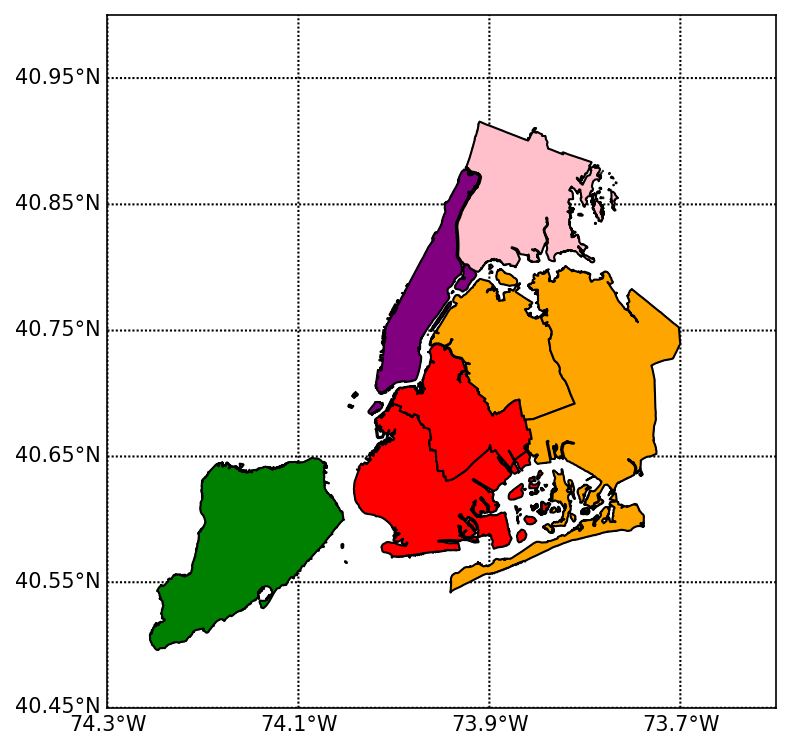

AttributeError: module 'fiona' has no attribute 'path'

In [20]:
import geopandas as gpd
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch

fig = plt.figure(dpi=150)
ax = fig.add_subplot(111)

xmin=-74.3
xmax=-73.6
ymin=40.45
ymax=41
m = Basemap(projection='merc',lat_ts=10,llcrnrlon=xmin, urcrnrlon=xmax,llcrnrlat=ymin,urcrnrlat=ymax, resolution='c')
m.readshapefile('/nfs/homes/babischa/LH_CD_BARBARABISCHAIN/maps/nyzones','mapa', drawbounds=True)
m.drawparallels(np.arange(ymin,ymax, .1), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(xmin,xmax, .2), labels=[0,0,0,1], fontsize=10)

zones={'QW':'orange','BKS':'red','SI':'green','MN':'purple','BX':'pink','BKN':'red','QE':'orange'}
colors=[]
patches   = []

for info , shape in zip(m.mapa_info, m.mapa):
    if (info['zone']):
        patches.append( Polygon(np.array(shape), True) )
        colors.append(zones[info['zone']])
ax.add_collection(PatchCollection(patches, facecolor=colors, edgecolor='k', linewidths=1., zorder=2))
# print(colors)
# print(patches)
plt.show()
#plt.savefig('mapa.png', dpi=300, bbox_inches='tight')

gdf = gpd.read_file("nyzones.shp")
print(gdf)


In [2]:
import joblib

joblib.dump(project, 'modelo.pkl')
print("Modelo salvo com sucesso como 'modelo.pkl'.")

NameError: name 'project' is not defined